In [1]:
from os import listdir
from os.path import isfile, join
from skimage.color import rgb2gray
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2

In [11]:
!wget http://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz
!uncompress BSR_bsds500.tgz
!tar -xvf BSR_bsds500.tar
!ls

--2019-08-31 14:08:29--  http://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz
Resolving www.eecs.berkeley.edu (www.eecs.berkeley.edu)... 23.185.0.1, 2620:12a:8000::1, 2620:12a:8001::1
Connecting to www.eecs.berkeley.edu (www.eecs.berkeley.edu)|23.185.0.1|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz [following]
--2019-08-31 14:08:29--  https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz
Resolving www2.eecs.berkeley.edu (www2.eecs.berkeley.edu)... 128.32.189.73
Connecting to www2.eecs.berkeley.edu (www2.eecs.berkeley.edu)|128.32.189.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70763455 (67M) [application/x-tar]
Saving to: ‘BSR_bsds500.tgz’

BSR_bsds500.tgz     100%[===================>]  67.48M  7.95MB/s    in 13s     

2019-08-31 14:08:43 (5.19 MB/s) - ‘BSR

BSR/BSDS500/data/groundTruth/test/41085.mat
BSR/BSDS500/data/groundTruth/test/196062.mat
BSR/BSDS500/data/groundTruth/test/346016.mat
BSR/BSDS500/data/groundTruth/test/176051.mat
BSR/BSDS500/data/groundTruth/test/393035.mat
BSR/BSDS500/data/groundTruth/test/246009.mat
BSR/BSDS500/data/groundTruth/test/249021.mat
BSR/BSDS500/data/groundTruth/test/225022.mat
BSR/BSDS500/data/groundTruth/test/112056.mat
BSR/BSDS500/data/groundTruth/test/104055.mat
BSR/BSDS500/data/groundTruth/test/238025.mat
BSR/BSDS500/data/groundTruth/test/368037.mat
BSR/BSDS500/data/groundTruth/test/105027.mat
BSR/BSDS500/data/groundTruth/test/118015.mat
BSR/BSDS500/data/groundTruth/test/71076.mat
BSR/BSDS500/data/groundTruth/test/163004.mat
BSR/BSDS500/data/groundTruth/test/288024.mat
BSR/BSDS500/data/groundTruth/test/253092.mat
BSR/BSDS500/data/groundTruth/test/258089.mat
BSR/BSDS500/data/groundTruth/test/6046.mat
BSR/BSDS500/data/groundTruth/test/253016.mat
BSR/BSDS500/data/groundTruth/test/187099.mat
BSR/BSDS500/da

BSR/BSDS500/data/images/train/170054.jpg
BSR/BSDS500/data/images/train/249061.jpg
BSR/BSDS500/data/images/train/216066.jpg
BSR/BSDS500/data/images/train/22093.jpg
BSR/BSDS500/data/images/train/43083.jpg
BSR/BSDS500/data/images/train/254033.jpg
BSR/BSDS500/data/images/train/94079.jpg
BSR/BSDS500/data/images/train/159091.jpg
BSR/BSDS500/data/images/train/166081.jpg
BSR/BSDS500/data/images/train/130034.jpg
BSR/BSDS500/data/images/train/55075.jpg
BSR/BSDS500/data/images/train/106020.jpg
BSR/BSDS500/data/images/train/189011.jpg
BSR/BSDS500/data/images/train/61060.jpg
BSR/BSDS500/data/images/train/41004.jpg
BSR/BSDS500/data/images/train/95006.jpg
BSR/BSDS500/data/images/train/198054.jpg
BSR/BSDS500/data/images/train/67079.jpg
BSR/BSDS500/data/images/train/246053.jpg
BSR/BSDS500/data/images/train/370036.jpg
BSR/BSDS500/data/images/train/135037.jpg
BSR/BSDS500/data/images/train/61086.jpg
BSR/BSDS500/data/images/train/71046.jpg
BSR/BSDS500/data/images/train/151087.jpg
BSR/BSDS500/data/images/tr

BSR/BSDS500/data/images/val/296007.jpg
BSR/BSDS500/data/images/val/123074.jpg
BSR/BSDS500/data/images/val/306005.jpg
BSR/BSDS500/data/images/val/19021.jpg
BSR/BSDS500/data/images/val/271035.jpg
BSR/BSDS500/data/images/val/12084.jpg
BSR/BSDS500/data/images/val/260058.jpg
BSR/BSDS500/data/images/val/361010.jpg
BSR/BSDS500/data/images/val/62096.jpg
BSR/BSDS500/data/images/val/3096.jpg
BSR/BSDS500/data/images/val/126007.jpg
BSR/BSDS500/data/images/val/130026.jpg
BSR/BSDS500/data/images/val/253027.jpg
BSR/BSDS500/data/images/val/376043.jpg
BSR/BSDS500/data/images/val/143090.jpg
BSR/BSDS500/data/images/val/170057.jpg
BSR/BSDS500/data/images/val/385039.jpg
BSR/BSDS500/data/images/val/159008.jpg
BSR/BSDS500/data/images/val/134035.jpg
BSR/BSDS500/data/images/val/216081.jpg
BSR/BSDS500/data/images/val/89072.jpg
BSR/BSDS500/data/images/val/220075.jpg
BSR/BSDS500/data/images/val/223061.jpg
BSR/BSDS500/data/images/val/148026.jpg
BSR/BSDS500/data/images/val/33039.jpg
BSR/BSDS500/data/images/val/1470

BSR/BSDS500/data/images/test/107072.jpg
BSR/BSDS500/data/images/test/217013.jpg
BSR/BSDS500/data/images/test/69022.jpg
BSR/BSDS500/data/images/test/134067.jpg
BSR/BSDS500/data/images/test/118015.jpg
BSR/BSDS500/data/images/test/94095.jpg
BSR/BSDS500/data/images/test/164046.jpg
BSR/BSDS500/data/images/test/81095.jpg
BSR/BSDS500/data/images/test/181021.jpg
BSR/BSDS500/data/images/test/268074.jpg
BSR/BSDS500/data/images/test/160067.jpg
BSR/BSDS500/data/images/test/103006.jpg
BSR/BSDS500/data/images/test/302022.jpg
BSR/BSDS500/data/images/test/388018.jpg
BSR/BSDS500/data/images/test/207049.jpg
BSR/BSDS500/data/images/test/8068.jpg
BSR/BSDS500/data/images/test/106005.jpg
BSR/BSDS500/data/images/test/43051.jpg
BSR/BSDS500/data/images/test/109055.jpg
BSR/BSDS500/data/images/test/258089.jpg
BSR/BSDS500/data/images/test/41085.jpg
BSR/BSDS500/data/images/test/105027.jpg
BSR/BSDS500/data/images/test/6046.jpg
BSR/BSDS500/data/images/test/41096.jpg
BSR/BSDS500/data/images/test/196027.jpg
BSR/BSDS50

In [12]:

#get all the images files and boundary file
img_dir = 'BSR/BSDS500/data/images/train/'
boundary_dir = 'BSR/BSDS500/data/groundTruth/train/'


In [13]:
img_files = [f for f in listdir(img_dir) if isfile(join(img_dir, f)) and f.endswith(".jpg")]

In [14]:
len(img_files)

200

In [15]:
len(listdir(img_dir))

201

In [16]:
boundary_files = [f for f in listdir(boundary_dir) if isfile(join(boundary_dir, f)) and f.endswith(".mat")]


In [21]:
sorted_img_files = sorted(img_files)
sorted_boundary_files = sorted(boundary_files)

In [25]:
def get_GT_images(sorted_boundary_files):
    images={}
    i=0
    for path in sorted_boundary_files:
        gTs_per_image={}
        path='BSR/BSDS500/data/groundTruth/train/'+path
        mat=scipy.io.loadmat(path)
        groundTruth=mat.get('groundTruth')
        label_num=groundTruth.size
        for M in range(label_num):
            segmentation=groundTruth[0][M]['Segmentation'][0][0]
            gTs_per_image[M]=segmentation
        images[i]=gTs_per_image
        i+=1
    return images

In [26]:
def get_GT_images_boundary(sorted_boundary_files):
    images={}
    i=0
    for path in sorted_boundary_files:
        gTs_per_image={}
        path='BSR/BSDS500/data/groundTruth/train/'+path
        mat=scipy.io.loadmat(path)
        groundTruth=mat.get('groundTruth')
        label_num=groundTruth.size
        for M in range(label_num):
            segmentation=groundTruth[0][M]['Boundaries'][0][0]
            gTs_per_image[M]=segmentation
        images[i]=gTs_per_image
        i+=1
    return images

In [27]:
images=get_GT_images(sorted_boundary_files)
boundaries=get_GT_images_boundary(sorted_boundary_files)

'100075.mat'

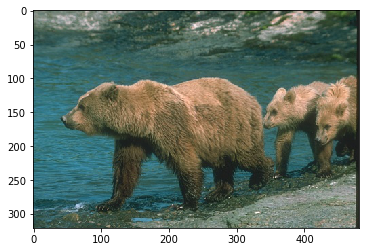

100075.mat
photo and color segments:
boundaries of clusters:


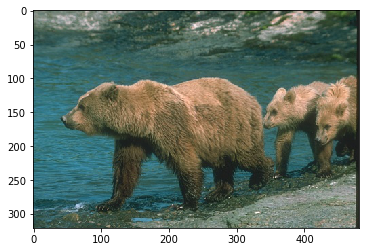

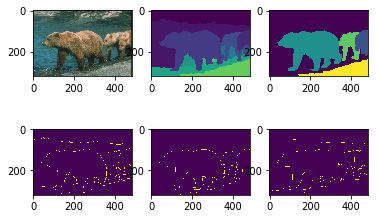

In [37]:
print(sorted_boundary_files[0])
x=img.imread(img_dir+sorted_img_files[0])
plt.imshow(x)
f, axarr = plt.subplots(2,3)
print("photo and color segments:")
axarr[0,0].imshow(x)
axarr[0,1].imshow(images[0][0])
axarr[0,2].imshow(images[0][1])

print("boundaries of clusters:")
axarr[1,0].imshow(boundaries[0][0])
axarr[1,1].imshow(boundaries[0][1])
axarr[1,2].imshow(boundaries[0][2])

108073.mat
photo and color segments:
boundaries:


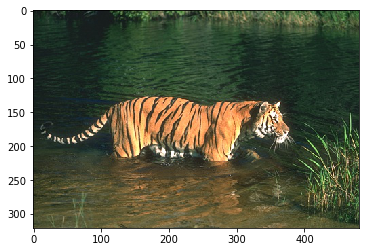

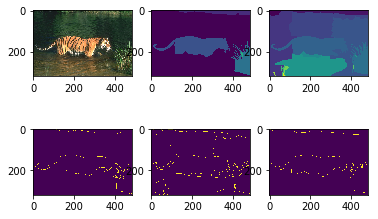

In [44]:
print(sorted_boundary_files[10])
x=img.imread("BSR/BSDS500/data/images/train/"+sorted_img_files[10])
plt.imshow(x)
f, axarr = plt.subplots(2,3)
print("photo and color segments:")
axarr[0,0].imshow(x)
axarr[0,1].imshow(images[10][0])
axarr[0,2].imshow(images[10][1])

print("boundaries:")
axarr[1,0].imshow(boundaries[10][0])
axarr[1,1].imshow(boundaries[10][1])
axarr[1,2].imshow(boundaries[10][2])

In [49]:
def images_to_seg_colored(imgs,K):
    imgs_=[]
    for img in imgs:
        Z = img.reshape((-1,3))
        
        #convert to np.float32
        Z = np.float32(Z)
        
        #define criteria, number of clusters(K) and apply kmeans()
        criteria = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,10,1.0)
        ret,label,center = cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
        
        #Now convert back into uint8, and make original image
        center = np.uint8(center)
        res = center[label.flatten()]
        res2 = res.reshape((img.shape))
        imgs_.append(res2)
    return imgs_

In [50]:
#K=5
image_matrix = img.imread("BSR/BSDS500/data/images/train/105019.jpg")
seg_images = images_to_seg_colored([image_matrix],5)[0]

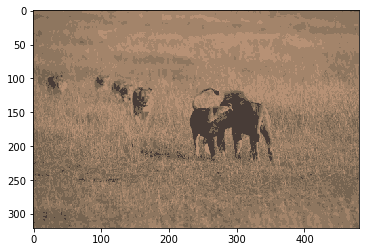

In [53]:
plt.imshow(seg_images)

In [56]:
#kmeans segmentation
def images_to_seg(imgs,K):
    imgs_gray = []
    for img in imgs:
        Z = img.reshape((-1,3))
        
        #convert to np.float32
        Z = np.float32(Z)
        
        #define criteria, number of clusters(K) and apply kmeans()
        criteria = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,10,1.0)
        
        #K=8
        ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
        
        #Now convert back into uint8, and make original image
        center = np.uint(center)
        res = center[label.flatten()]
        res2 = res.reshape((img.shape))
        
        #make images grayscale
        img_gray = rgb2gray(res2)
        '''
        plt.imshow(img_gray)
        plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
        plt.show()
        '''
        imgs_gray.append(img_gray)
    return imgs_gray

/home/harry/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from uint64 to float64
  .format(dtypeobj_in, dtypeobj_out))


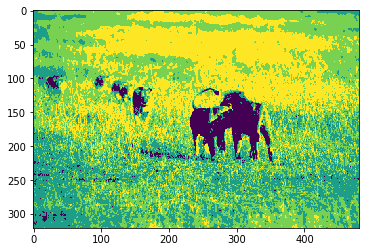

In [65]:
#K=4
image_matrix = img.imread("BSR/BSDS500/data/images/train/105019.jpg")
seg_images = images_to_seg([image_matrix],4)[0]
plt.imshow(seg_images)